# Exploratory Data Analysis

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
% matplotlib inline
from mpl_toolkits.basemap import Basemap

In [2]:
TRAIN_FILENAME = '../data/data-for-processing/cleaned_chunk_011_train.feather'
TEST_FILENAME = '../data/data-for-processing/cleaned_test.feather'

In [3]:
df = pd.read_feather(TRAIN_FILENAME)

/home/solomon/anaconda3/envs/py3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422366 entries, 0 to 422365
Data columns (total 20 columns):
level_0                    422366 non-null int64
index                      422366 non-null int64
key                        422366 non-null object
fare_amount                422366 non-null float64
pickup_datetime            422366 non-null object
pickup_longitude           422366 non-null float64
pickup_latitude            422366 non-null float64
dropoff_longitude          422366 non-null float64
dropoff_latitude           422366 non-null float64
passenger_count            422366 non-null int64
pickup_timezone            422366 non-null object
pickup_datetime_obj        422366 non-null datetime64[ns]
pickup_year                422366 non-null int64
pickup_month               422366 non-null int64
pickup_day                 422366 non-null int64
pickup_hour                422366 non-null int64
pickup_minute              422366 non-null int64
pickup_second              422366 

In [5]:
df.head()

,level_0,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_timezone,pickup_datetime_obj,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_weekday,pickup_dropoff_distance
0,0,55000000,2009-06-30 09:25:00.00000094,6.5,2009-06-30 09:25:00 UTC,-73.990421,40.718843,-74.000060,40.727895,1,UTC,2009-06-30 09:25:00,2009,6,30,9,25,0,1,1.293418
1,1,55000001,2009-09-28 18:04:43.0000001,5.7,2009-09-28 18:04:43 UTC,-73.974759,40.749067,-73.983955,40.736129,1,UTC,2009-09-28 18:04:43,2009,9,28,18,4,43,0,1.633982
2,2,55000002,2010-05-22 22:54:51.0000003,10.9,2010-05-22 22:54:51 UTC,-73.981731,40.722242,-74.006415,40.708414,1,UTC,2010-05-22 22:54:51,2010,5,22,22,54,51,5,2.586945
3,3,55000003,2013-10-24 20:03:46.0000004,8.0,2013-10-24 20:03:46 UTC,-73.990378,40.751507,-74.005202,40.741458,2,UTC,2013-10-24 20:03:46,2013,10,24,20,3,46,3,1.675733
4,4,55000004,2013-12-20 00:52:00.00000041,9.5,2013-12-20 00:52:00 UTC,-73.977433,40.668257,-73.951930,40.683825,1,UTC,2013-12-20 00:52:00,2013,12,20,0,52,0,4,2.760821


## Training Dataset

### `fare_amount`

- drop the record which has negative `fare_amount`

In [6]:
df.loc[:, 'fare_amount'].describe()

count    422366.000000
mean         11.340381
std           9.696988
min           0.010000
25%           6.000000
50%           8.500000
75%          12.500000
max         300.000000
Name: fare_amount, dtype: float64

In [7]:
df[df['fare_amount'] < 2.5]

,level_0,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_timezone,pickup_datetime_obj,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_weekday,pickup_dropoff_distance
5635,5652,55005652,2010-03-31 10:24:09.0000002,1.00,2010-03-31 10:24:09 UTC,-73.971016,40.766982,-73.972270,40.765434,1,UTC,2010-03-31 10:24:09,2010,3,31,10,24,9,2,0.201945
73045,73304,55073304,2010-03-22 22:37:00.00000032,0.11,2010-03-22 22:37:00 UTC,-73.793512,40.656922,-73.793508,40.656903,1,UTC,2010-03-22 22:37:00,2010,3,22,22,37,0,0,0.002139
87248,87543,55087543,2013-08-13 15:58:00.000000102,1.50,2013-08-13 15:58:00 UTC,0.000000,0.000000,0.000000,0.000000,1,UTC,2013-08-13 15:58:00,2013,8,13,15,58,0,1,0.000000
107400,107758,55107758,2015-06-14 21:04:40.0000005,0.01,2015-06-14 21:04:40 UTC,-73.122307,40.787441,-73.122307,40.787445,2,UTC,2015-06-14 21:04:40,2015,6,14,21,4,40,6,0.000424
139444,139906,55139906,2015-06-01 21:46:57.0000009,0.01,2015-06-01 21:46:57 UTC,-73.996986,40.689171,-73.996986,40.689171,1,UTC,2015-06-01 21:46:57,2015,6,1,21,46,57,0,0.000000
156496,157009,55157009,2013-08-25 15:24:22.0000002,0.01,2013-08-25 15:24:22 UTC,-74.177632,40.695360,-74.177622,40.695375,1,UTC,2013-08-25 15:24:22,2013,8,25,15,24,22,6,0.001869
246150,247015,55247015,2015-05-10 14:10:17.0000002,0.01,2015-05-10 14:10:17 UTC,-74.035683,40.724957,-74.035683,40.724957,1,UTC,2015-05-10 14:10:17,2015,5,10,14,10,17,6,0.000000


In [8]:
df = df[df['fare_amount'] >= 2.5]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422359 entries, 0 to 422365
Data columns (total 20 columns):
level_0                    422359 non-null int64
index                      422359 non-null int64
key                        422359 non-null object
fare_amount                422359 non-null float64
pickup_datetime            422359 non-null object
pickup_longitude           422359 non-null float64
pickup_latitude            422359 non-null float64
dropoff_longitude          422359 non-null float64
dropoff_latitude           422359 non-null float64
passenger_count            422359 non-null int64
pickup_timezone            422359 non-null object
pickup_datetime_obj        422359 non-null datetime64[ns]
pickup_year                422359 non-null int64
pickup_month               422359 non-null int64
pickup_day                 422359 non-null int64
pickup_hour                422359 non-null int64
pickup_minute              422359 non-null int64
pickup_second              422359 

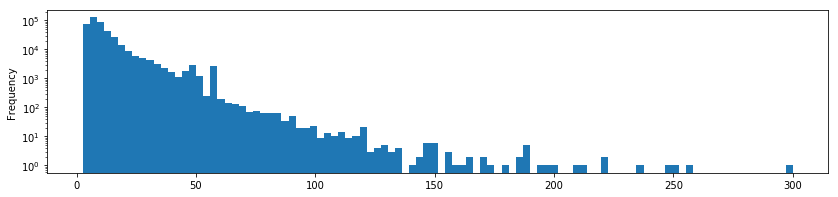

In [9]:
df['fare_amount'].plot.hist(bins=100, logy=True, figsize=[14, 3])

### `pickup_datetime`

- 进行如下拆分:
    + `pickup_year`
    + `pickup_month`
    + `pickup_day`
    + `pickup_hour`
    + `pickup_min`
    + `pickup_sec`
    + `pickup_timezone`
    + `pickup_weekday`
- 根据实际情况, 每一年的路况和费用在发生变化, 因此预测时可以针对每一年分别建立起来模型
- 考虑使用夏时令对UTC时间进行转换

In [10]:
df['pickup_year'].value_counts()

2012    67869
2011    66513
2013    66323
2009    65063
2010    63882
2014    62875
2015    29834
Name: pickup_year, dtype: int64

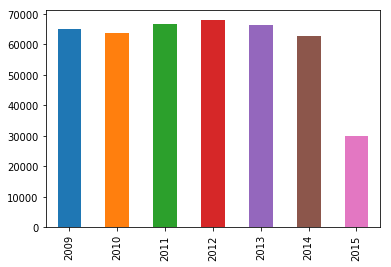

In [11]:
df['pickup_year'].value_counts(sort=False).plot(kind='bar')

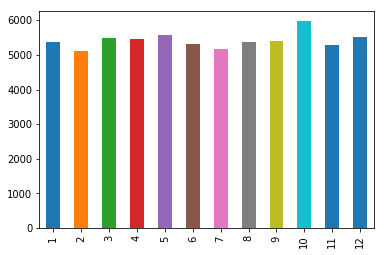

In [12]:
df[df['pickup_year']==2009]['pickup_month'].value_counts(sort=False).plot(kind='bar')

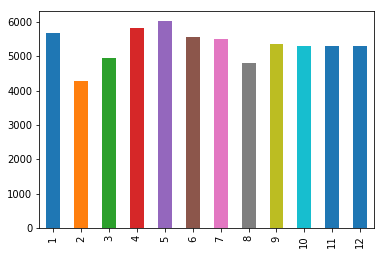

In [13]:
df[df['pickup_year']==2010]['pickup_month'].value_counts(sort=False).plot(kind='bar')

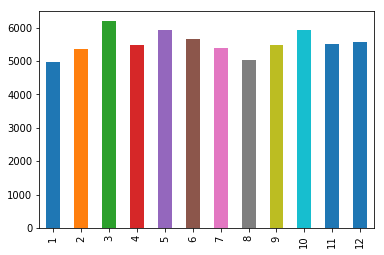

In [14]:
df[df['pickup_year']==2011]['pickup_month'].value_counts(sort=False).plot(kind='bar')

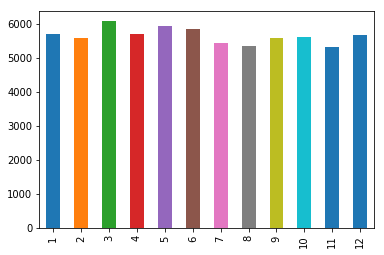

In [15]:
df[df['pickup_year']==2012]['pickup_month'].value_counts(sort=False).plot(kind='bar')

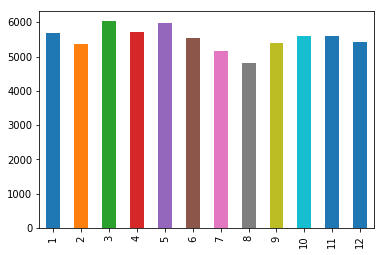

In [16]:
df[df['pickup_year']==2013]['pickup_month'].value_counts(sort=False).plot(kind='bar')

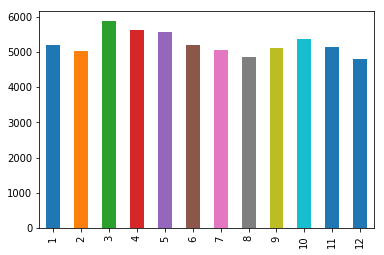

In [17]:
df[df['pickup_year']==2014]['pickup_month'].value_counts(sort=False).plot(kind='bar')

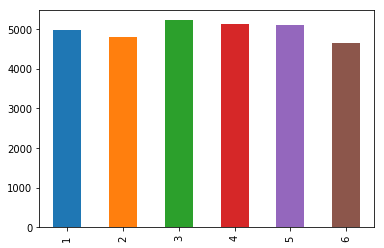

In [18]:
df[df['pickup_year']==2015]['pickup_month'].value_counts(sort=False).plot(kind='bar')

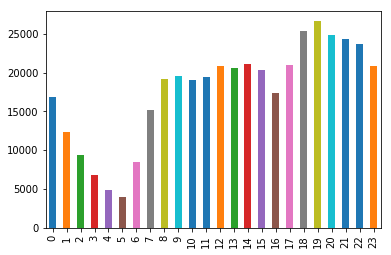

In [19]:
df['pickup_hour'].value_counts(sort=False).plot(kind='bar')

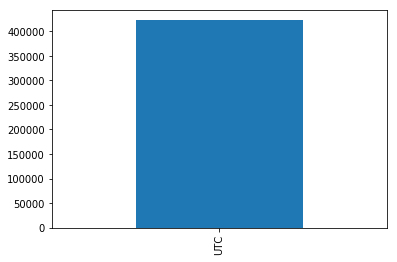

In [20]:
df['pickup_timezone'].value_counts(sort=False).plot(kind='bar')

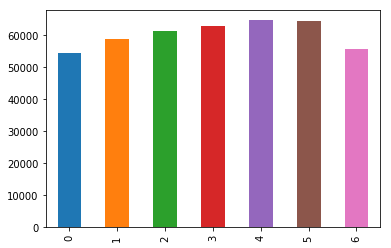

In [21]:
df['pickup_weekday'].value_counts(sort=False).plot(kind='bar')

In [22]:
df[df['pickup_hour'] >= 20]['fare_amount'].describe()

count    93837.000000
mean        11.184346
std          8.983899
min          2.500000
25%          6.100000
50%          8.500000
75%         12.900000
max        255.500000
Name: fare_amount, dtype: float64

### `pickup_longitude` and `pickup_latitude`

- 清除掉明显超出纽约范围的记录

In [23]:
df['pickup_longitude'].describe()

count    422359.000000
mean        -72.488576
std          10.501548
min        -121.925805
25%         -73.992127
50%         -73.981834
75%         -73.967088
max          73.863260
Name: pickup_longitude, dtype: float64

In [24]:
df['pickup_latitude'].describe()

count    422359.000000
mean         39.911074
std           6.167775
min         -74.016272
25%          40.734930
50%          40.752672
75%          40.767090
max          79.683333
Name: pickup_latitude, dtype: float64

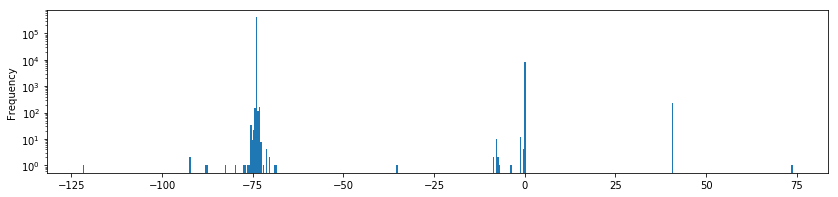

In [25]:
df['pickup_longitude'].plot(kind='hist', bins=500, figsize=[14, 3], logy=True)

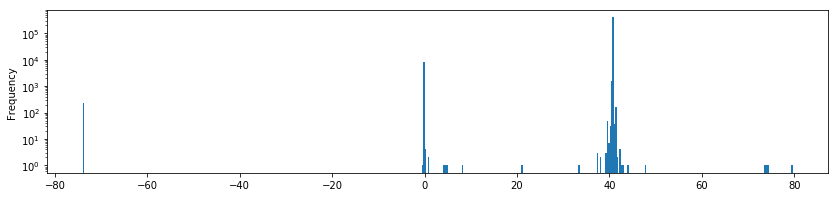

In [26]:
df['pickup_latitude'].plot(kind='hist', bins=500, figsize=[14, 3], logy=True)

### `passenger_count`

- 清除掉`passenger_count`为0的记录

In [27]:
df['passenger_count'].value_counts()

1    293047
2     62726
5     30077
3     18547
4      9016
6      8946
Name: passenger_count, dtype: int64

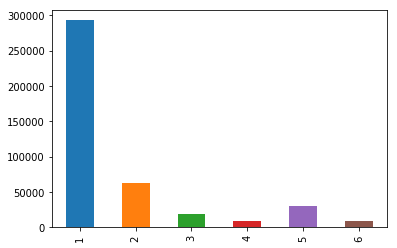

In [28]:
df['passenger_count'].value_counts(sort=False).plot(kind='bar')

## Testing Dataset

In [29]:
test_df = pd.read_feather(TEST_FILENAME)

/home/solomon/anaconda3/envs/py3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [30]:
test_df.head()

,index,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_timezone,pickup_datetime_obj,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_weekday,pickup_dropoff_distance
0,0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,UTC,2015-01-27 13:08:24,2015,1,27,13,8,24,1,2.323260
1,1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,UTC,2015-01-27 13:08:24,2015,1,27,13,8,24,1,2.425353
2,2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,UTC,2011-10-08 11:53:44,2011,10,8,11,53,44,5,0.618628
3,3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,UTC,2012-12-01 21:12:12,2012,12,1,21,12,12,5,1.961033
4,4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,UTC,2012-12-01 21:12:12,2012,12,1,21,12,12,5,5.387301


In [31]:
test_df.describe()

,index,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_weekday,pickup_dropoff_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,4956.500000,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,16.194170,13.467420,29.548416,16.610853,2.852834,3.435371
std,2862.069618,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,6.868584,18.674818,19.571034,1.994451,3.972374
min,0.000000,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2478.250000,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,9.000000,8.000000,13.000000,0.000000,1.000000,1.298277
50%,4956.500000,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,15.000000,33.000000,6.000000,3.000000,2.217412
75%,7434.750000,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000,10.000000,25.000000,19.000000,45.000000,33.000000,5.000000,4.045302
max,9913.000000,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,23.000000,59.000000,59.000000,6.000000,99.996040


In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 18 columns):
index                      9914 non-null int64
key                        9914 non-null object
pickup_datetime            9914 non-null object
pickup_longitude           9914 non-null float64
pickup_latitude            9914 non-null float64
dropoff_longitude          9914 non-null float64
dropoff_latitude           9914 non-null float64
passenger_count            9914 non-null int64
pickup_timezone            9914 non-null object
pickup_datetime_obj        9914 non-null datetime64[ns]
pickup_year                9914 non-null int64
pickup_month               9914 non-null int64
pickup_day                 9914 non-null int64
pickup_hour                9914 non-null int64
pickup_minute              9914 non-null int64
pickup_second              9914 non-null int64
pickup_weekday             9914 non-null int64
pickup_dropoff_distance    9914 non-null float64
dtypes: datetime64[ns](1)

## datetime

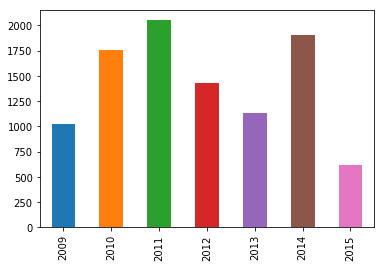

In [33]:
test_df['pickup_year'].value_counts(sort=False).plot(kind='bar')

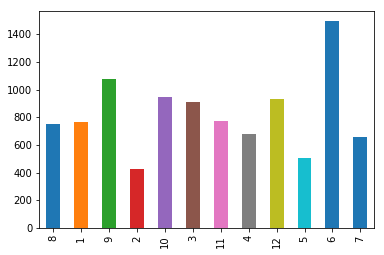

In [34]:
test_df['pickup_month'].value_counts(sort=False).plot(kind='bar')

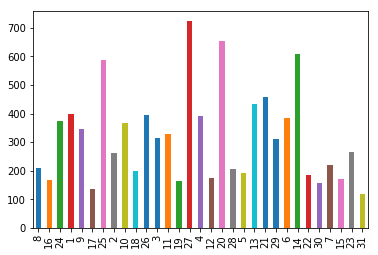

In [35]:
test_df['pickup_day'].value_counts(sort=False).plot(kind='bar')